### SARSA

In [90]:
import random
import numpy as np

TREASURE = "T"
WALL = "W"
SNAKE_PIT = "S"

UP = "^"
DOWN = "v"
RIGHT = ">"
LEFT = "<"
ACTIONS = [UP, DOWN, RIGHT, LEFT]
ACTION_POSITION_MAPPER = {
    UP: (-1, 0),
    RIGHT: (0, 1),
    DOWN: (1, 0),
    LEFT: (0, -1)
}

SNAKE_PIT_POSITION = (6, 5)
TREASURE_POSITION = (8, 8)

def get_world():
    world = [[random.choice(ACTIONS) for i in range(9)] for j in range(9)]
    for column in range(2, 7):
        world[1][column] = WALL

    for column in range(1, 5):
        world[7][column] = WALL

    for row in range(1, 6):
        world[row][6] = WALL

    world[SNAKE_PIT_POSITION[0]][SNAKE_PIT_POSITION[1]] = SNAKE_PIT
    world[TREASURE_POSITION[0]][TREASURE_POSITION[1]] = TREASURE
    
    return world

def print_world(world):
    for row in world:
        print(" ".join(row))

def choose_action(Q, new_state, epsilon=0):
    if np.random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)
    else:
        actions_utilities = Q[new_state]
        return ACTIONS[np.argmax(actions_utilities)]

def get_start_state(world):
    row = None
    column = None
    while True:
        row = random.choice(range(9))
        column = random.choice(range(9))
        if world[row][column] not in [SNAKE_PIT, TREASURE, WALL]:
            break

    return (0, 0)

def get_new_state(world, current_state, action):
  position_updater = ACTION_POSITION_MAPPER[action]
  new_state = (current_state[0] + position_updater[0], current_state[1] + position_updater[1])
  
  # row invalidation
  if new_state[0] < 0 or new_state[0] > 8:
     return current_state
  
  # column invalidation
  if new_state[1] < 0 or new_state[1] > 8:
    return current_state
  
  # wall invalidation
  if world[new_state[0]][new_state[1]] == WALL:
    return current_state

  return new_state

def final_state(state):
    return state in [SNAKE_PIT_POSITION, TREASURE_POSITION]

def get_reward(position):
    if position == TREASURE_POSITION:
        return 50
    
    if position == SNAKE_PIT_POSITION:
        return -50
    
    return -1

#### Some tests

In [91]:
assert final_state(TREASURE_POSITION)
assert final_state(SNAKE_PIT_POSITION)
assert get_reward(TREASURE_POSITION) == 50
assert get_reward(SNAKE_PIT_POSITION) == -50

assert get_new_state(get_world(), (7,8), "v") == (8, 8)
assert get_new_state(get_world(), (8,7), ">") == (8, 8)
assert not final_state((0, 0))

#### Learning through epochs

In [92]:
def run_sarsa(epochs = 2000, epsilon=0, alpha = 0.1, gamma = 0.9):
  world = get_world()
  Q = {(i,j):[0, 0 ,0 , 0] for i in range(9) for j in range(9)}

  rewards_history = []
  for epoch in range(epochs):
    current_state = get_start_state(world)
    current_action = choose_action(Q, current_state, epsilon=epsilon)

    reward_per_epoch = 0  
    while not final_state(current_state):
      new_state = get_new_state(world, current_state, current_action)
      new_action = choose_action(Q, new_state, epsilon=epsilon)

      reward = get_reward(new_state)
      reward_per_epoch += reward

      current_action_index_in_Q = ACTIONS.index(current_action)
      Q_current = Q[current_state][current_action_index_in_Q]
      
      new_action_index_in_Q = ACTIONS.index(current_action)
      Q_next = Q[new_state][new_action_index_in_Q]
      
      Q[current_state][current_action_index_in_Q] = Q_current + (alpha * (reward + gamma * Q_next - Q_current))

      current_state = new_state
      current_action = new_action
    
    rewards_history.append(reward_per_epoch)
  
  return Q, rewards_history

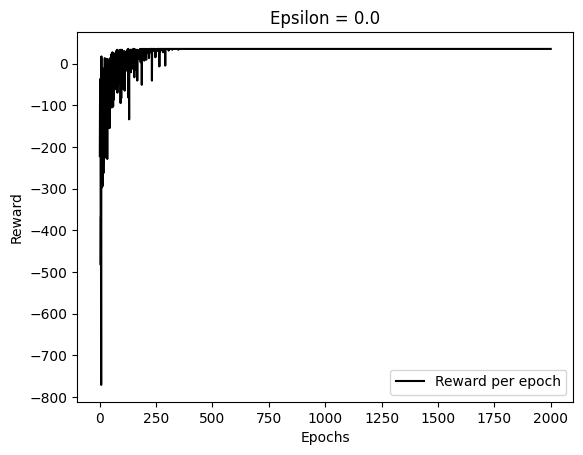

> > > > > > > > v
> ^ W W W W W v v
< < v < > v W v v
v > v < ^ ^ W v v
v < v v v > W > v
v v ^ < > < W ^ v
v < v ^ v S v < v
v W W W W > < > v
> > > > > > > > T
--------------------------------------------------------------------------------


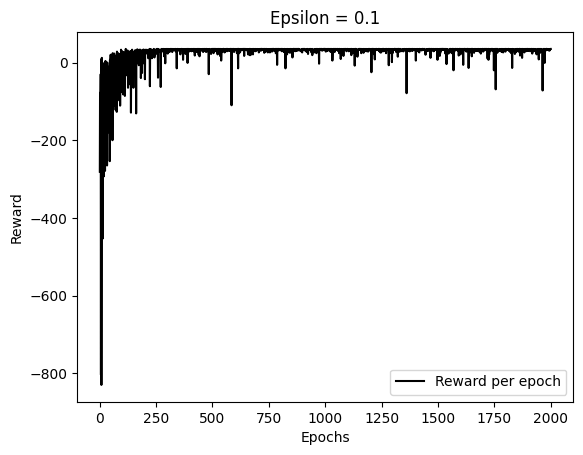

> > > > > > > > v
v v W W W W W v v
v < v ^ > ^ W v v
v > ^ v > < W > v
v ^ v > ^ < W v v
v < > v ^ ^ W v v
v < < ^ ^ S > > v
v W W W W < > < v
> > > > > > > > T
--------------------------------------------------------------------------------


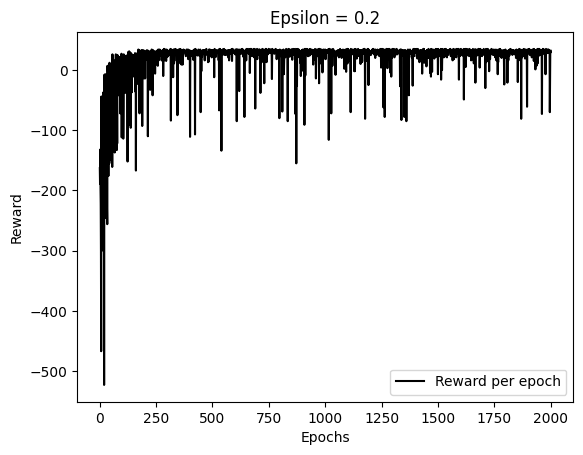

> > > > > > > > v
v v W W W W W v v
v v < < > > W < v
v v > v v ^ W v v
v ^ v > v > W < v
v v ^ v v > W v v
v ^ < ^ < S ^ ^ v
v W W W W > ^ < v
> > > > > > > > T
--------------------------------------------------------------------------------


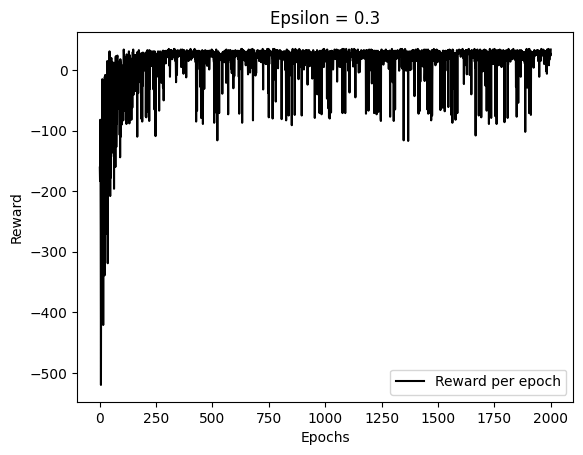

> > > > > > > v v
v v W W W W W > v
v v ^ > > ^ W > v
v ^ < > > ^ W < v
v v v > v < W v v
v v > > > < W > v
v ^ v ^ ^ S v v v
v W W W W v < > v
> > > > > > > > T
--------------------------------------------------------------------------------


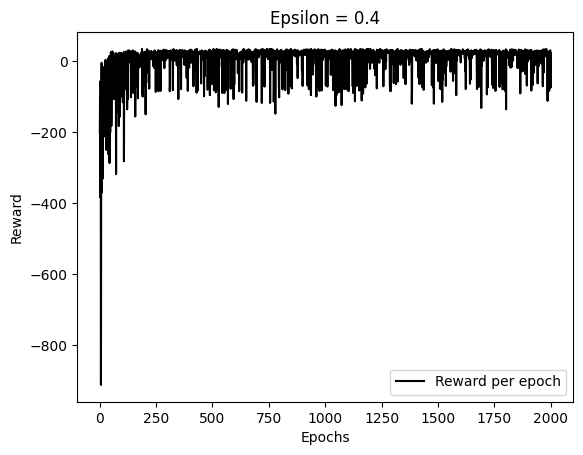

v > > > > > > v v
v > W W W W W < v
v v v > < < W v v
< v > < v > W v v
v < ^ ^ > > W v v
v < v < > < W v v
v v v < ^ S > > v
v W W W W > > < v
> > > > > > > > T
--------------------------------------------------------------------------------


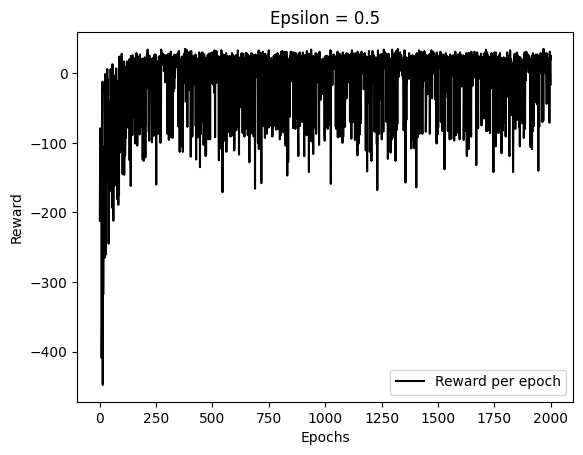

> > > > > > > v v
> > W W W W W > v
v v > v ^ < W < v
v v > v > < W v v
v < v > < > W v v
v ^ v ^ v < W v v
v < ^ ^ v S v v v
v W W W W v ^ < v
> > > > > > > > T
--------------------------------------------------------------------------------


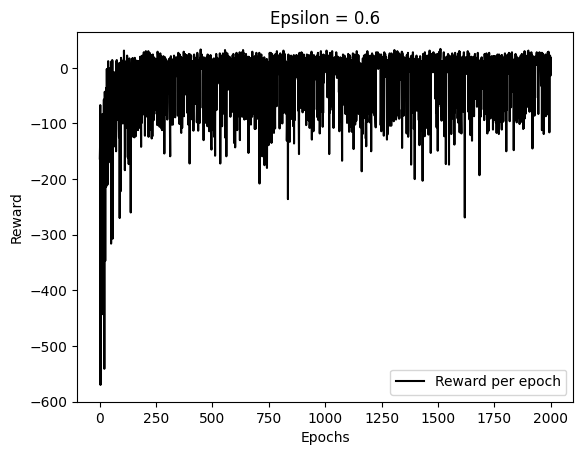

> > > > > > > v v
v v W W W W W v v
v > > v < < W v v
< < > > ^ ^ W v v
v > > < < < W v v
v v < v > ^ W v v
v < < v v S ^ v v
v W W W W v > > v
> > > > > > > > T
--------------------------------------------------------------------------------


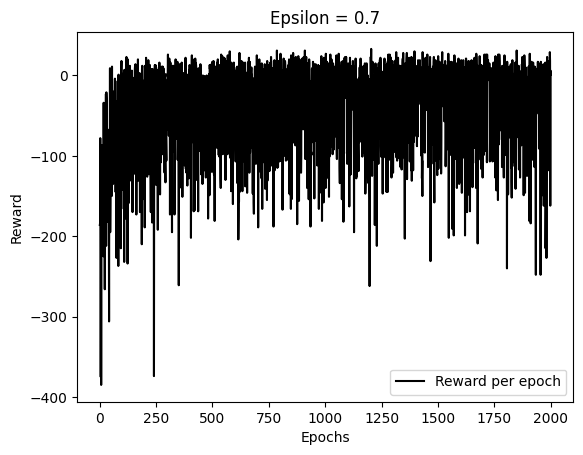

> > > > > > > v v
v v W W W W W v v
v < > > > < W v v
> > > v v ^ W v v
< < < < > > W v v
v > ^ > > > W v v
v < v < ^ S v v v
v W W W W < > v v
> > > > > > > > T
--------------------------------------------------------------------------------


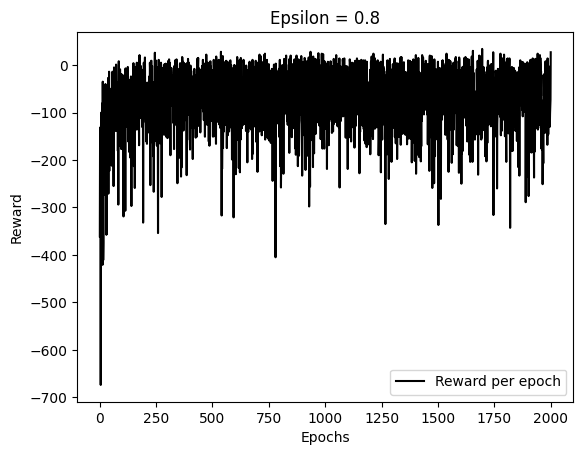

> > > > > > > v v
v v W W W W W v v
v > v v v ^ W v v
v > v > v < W v v
v < v > > < W v v
v > ^ < ^ < W v v
v v v v v S ^ v v
v W W W W < < v v
> > > > > > > > T
--------------------------------------------------------------------------------


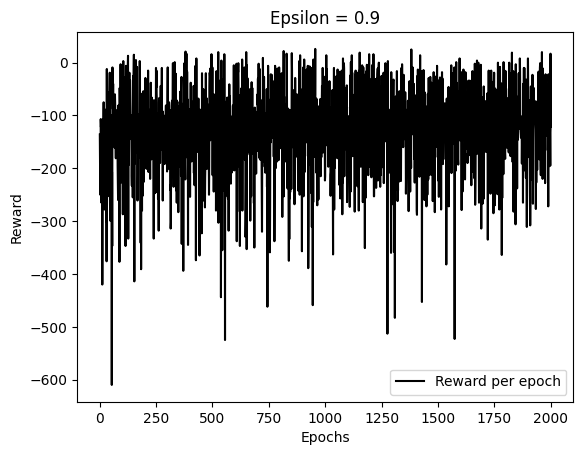

> > > > > > > v v
v v W W W W W v v
v > > v v > W v v
v v > > v > W v v
v v > v v ^ W v v
v > > > v > W v v
v < < < v S ^ v v
v W W W W > < v v
> > > > > > > > T
--------------------------------------------------------------------------------


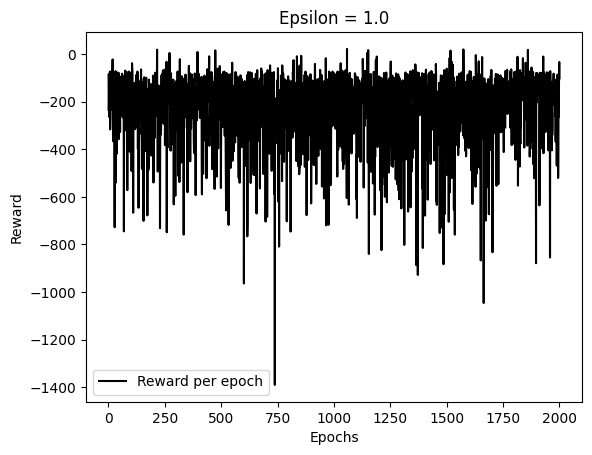

v > > > > > > v v
v v W W W W W v v
v > v v v > W v v
v > v v v > W v v
> > > > v > W v v
> > > > > > W v v
v v v v v S ^ v v
v W W W W < < v v
> > > > > > > > T
--------------------------------------------------------------------------------


In [93]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 2000
x = np.linspace(1, epochs, epochs)

for epsilon in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    Q, rewards_history = run_sarsa(epochs=epochs, epsilon=epsilon)
    # Plot rewards
    plt.plot(x, rewards_history, color='black', label=f"Reward per epoch")
    plt.xlabel('Epochs')
    plt.ylabel('Reward')
    plt.legend()
    plt.title(f"Epsilon = {epsilon}")
    plt.show()

    # Plot final policy
    world = get_world()
    for position in Q:
        actions_utilities = Q[position]
        if world[position[0]][position[1]] not in [SNAKE_PIT, WALL, TREASURE]:
            world[position[0]][position[1]] = ACTIONS[np.argmax(actions_utilities)]
    
    # Printing world
    print_world(world)

    print("-" * 80)